# Modelo de Regresión múltiple <a id="topic1"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


## Base de datos USA, Barack Obama

El archivo de datos `USA-data.txt` incluye información demográfica, social y económica de los 50 estados de los Estados Unidos, además del distrito de Columbia, durante el año en que Barack Obama ganó su segundo mandato presidencial. Estos datos provienen de diversas fuentes, como el Centro de Estadísticas de Estados Unidos, el Centro de Investigación Pew y la Oficina de Estadísticas Laborales. 

Se llevará a cabo un análisis de regresión lineal múltiple utilizando la variable `votos_obama` para representar el porcentaje de votos obtenidos por Obama en las elecciones de cada estado. Se evaluará su relación con la variable `educacion` que representa el nivel de educación universitaria en cada estado, la variable `afrodescendientes` que denota la población afrodescendiente en cada estado, la variable `personas_hispanohablantes` que indica la población hispanohablante en cada estado, y la variable `grupo_etnico_caucasico` que refleja la población de ascendencia caucásica en cada estado. <u>Después de realizar el análisis, se analizarán y discutirán los resultados clave obtenidos en el modelo de regresión lineal múltiple</u>.

In [28]:
# Cargamos la base de datos
usa = read.csv('USA.txt', sep=' ')
head(usa)

,estado,region,densidad,veteranos,mujeres,grad_instituto,grad_univ,afro,asia,hispanos,⋯,evangelicos,protestantes,relig_afro,catolicos,mormones,jubilados,paro,salario,obama,diputados
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,Alabama,3,94.4,8.1,51.5,82.6,22.3,26.2,1.1,3.9,⋯,49,1,18,6,1,13.8,8.0,43464,38.36,9
2,Alaska,4,1.2,10.1,48.0,91.6,27.5,3.3,5.4,5.5,⋯,26,19,2,14,4,7.7,7.6,63648,40.81,3
3,Arizona,4,56.3,8.2,50.3,85.4,26.6,4.1,2.8,29.6,⋯,23,15,2,25,4,13.8,8.4,47044,44.59,11
4,Arkansas,3,56.0,7.9,50.9,83.3,19.8,15.4,1.2,6.4,⋯,53,16,10,5,0,14.4,7.6,39018,36.88,6
5,California,4,239.1,5.0,50.3,81.0,30.5,6.2,13.0,37.6,⋯,18,14,4,31,2,11.4,10.4,57020,60.24,55
6,Colorado,4,48.5,8.1,49.9,89.9,36.7,4.0,2.8,20.7,⋯,23,19,2,19,2,10.9,7.8,57255,51.49,9


In [29]:
# Comprobamos la clase del objeto que vamos a utilizar
class(usa)

[1] "data.frame"

Después de procesar los datos en forma de dataframe, seleccionaremos únicamente aquellos que son relevantes para nuestro análisis de regresión.


In [30]:
# Realizamos el subset
usa <- usa[, c('grad_univ', 'afro', 'hispanos', 'blancos', 'obama')]
head(usa)

,grad_univ,afro,hispanos,blancos,obama
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,22.3,26.2,3.9,67.0,38.36
2,27.5,3.3,5.5,64.1,40.81
3,26.6,4.1,29.6,57.8,44.59
4,19.8,15.4,6.4,74.5,36.88
5,30.5,6.2,37.6,40.1,60.24
6,36.7,4.0,20.7,70.0,51.49


### Análisis de las variables


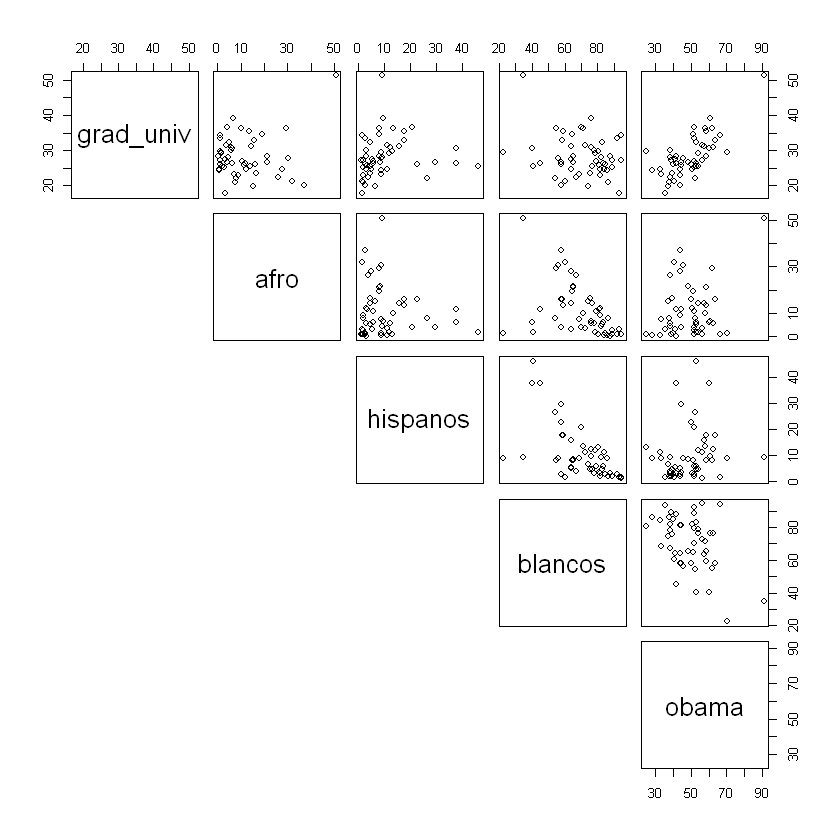

In [31]:
# Estudiamos si existe o no relación lineal entre las variables independientes y la dependiente
pairs(usa, lower.panel=NULL)

A simple vista, parece que la variable `grad_univ_mod` es la que mejor se relaciona con la variable dependiente `presidente`. También es crucial asegurarse de que las variables predictoras no estén muy interconectadas, ya que esto podría tener un impacto negativo en el modelo. En principio, no existe una correlación evidente. Sin embargo, vamos a verificar esto a través de pruebas respaldadas por evidencia

### Normalidad, Homocedasticidad y Correlación  de las variables

In [32]:
# Aplicamos el test de K-S-L para contrastar la normalidad (alternativa 2)
lapply(usa, FUN=lillie.test)

$grad_univ

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.10881, p-value = 0.1378


$afro

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.16532, p-value = 0.001322


$hispanos

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.21051, p-value = 5.898e-06


$blancos

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.10937, p-value = 0.1332


$obama

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.07775, p-value = 0.6177



Estos tests indican que las variables `grad_univ`, `blancos` y `obama` siguen distribuciones normales, porque sus $p$-valores respectivos son mayores que el nivel de importancia $\alpha = 0.05$, por lo tanto, no podemos rechazar las hipótesis nulas. Sin embargo, las variables `afro` e `hispanos` tienen $p$-valores más bajos, por lo que debemos rechazar sus hipótesis nulas, lo que quere decir que no provienen de distribuciones normales.

In [33]:
#Homocedasticidad
# Función auxiliar para convertir una lista de listas en un data frame
df.from.list.of.lists <- function(lists) {
    return(do.call(rbind, lists))
}

pairwise.bartlett.test <- function(df) {
    df.from.list.of.lists(lapply(df, FUN=function(x) lapply(df, FUN=function(y) bartlett.test(list(x, y))$p.value)))
}
                                                             
pairwise.bartlett.test(usa)

grad_univ    afro         hispanos     blancos      obama       
grad_univ 1            1.145541e-05 0.0001340336 1.956231e-11 1.387776e-06
afro      1.145541e-05 1            0.5369374    0.007718015  0.6264663   
hispanos  0.0001340336 0.5369374    1            0.001131649  0.2702484   
blancos   1.956231e-11 0.007718015  0.001131649  1            0.02841949  
obama     1.387776e-06 0.6264663    0.2702484    0.02841949   1

Por otra parte, los conjuntos de variables con homocedasticidad son `(afro, hipanos)`, `(afro, obama)` y `(hispanos, obama)`, ya que sus $p$-valores superan el umbral de significancia $\alpha = 0.05$, lo que impide el rechazo de la hipótesis nula del test de Bartlett que sugiere igualdad en sus varianzas. Por lo tanto, es importante tener en mente que los resultados del coeficiente de correlación de Pearson pueden no ser completamente confiables, pero podemos avanzar en cualquier situación.


In [34]:
# Estimamos el coeficiente de correlación de Pearson
cor(usa)

,grad_univ,afro,hispanos,blancos,obama
grad_univ,1.0000000,0.1689640,0.1282210,-0.2450445,0.7154854
afro,0.1689640,1.0000000,-0.1083742,-0.4799778,0.2834353
hispanos,0.1282210,-0.1083742,1.0000000,-0.6126307,0.1601314
blancos,-0.2450445,-0.4799778,-0.6126307,1.0000000,-0.4292205
obama,0.7154854,0.2834353,0.1601314,-0.4292205,1.0000000


Observamos que algunos valores de relación son algo bajos. Resaltan los conjuntos de características `(afro, blancos)` e `(hispanos, blancos)`, con una fuerte correlación negativa y, en particular, `(grad_univ, obama)` y `(blancos, obama)`, ya que se relacionan con la característica objetivo. Comprobemos si estas relaciones son estadísticamente significativas.


In [35]:
# Obtenemos los p-valores de cada pareja
pairwise.cor.test <- function(df, ...) {
    df.from.list.of.lists(
        lapply(df, FUN=function(x) lapply(
                df, FUN=function(y) cor.test(x, y, ...)$p.value
            )
        )
    )
}

pairwise.cor.test(usa)

grad_univ    afro         hispanos     blancos      obama       
grad_univ 0            0.2359087    0.3698846    0.08307509   3.633164e-09
afro      0.2359087    0            0.4490541    0.0003649565 0.04385312  
hispanos  0.3698846    0.4490541    0            1.769679e-06 0.2616592   
blancos   0.08307509   0.0003649565 1.769679e-06 0            0.001672692 
obama     3.633164e-09 0.04385312   0.2616592    0.001672692  0

En la tabla, se presentan los valores $p$ resultantes de las pruebas de correlación de Pearson para diversos pares de variables. Es importante destacar que se observan correlaciones significativas entre los siguientes pares: `(afro, blancos)`, `(hispanos, blancos)`, `(grad_univ, obama)`, `(afro, obama)`, y `(blancos, obama)`. Estos valores $p$ son inferiores al nivel de significación establecido en $\alpha = 0.05$, luego rechazamos las hipótesis nulas de que sus correlaciones sean cero. En principio, la correlación entre las variables explicativas puede ser problemática, así que tenemos que tenerlo en cuenta a la hora de ajustar el modelo.


### Generación del modelo

In [36]:
# Aplicamos el ajuste de regresión lineal a través de la función lm
ols <- lm(obama~grad_univ+afro+hispanos+blancos, data=usa)

# Obtenemos un summary de la salida
output <- summary(ols)
output


Call:
lm(formula = obama ~ grad_univ + afro + hispanos + blancos, data = usa)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.5451  -4.6028   0.1903   5.6963  14.3227 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.56196   12.91549   2.599   0.0125 *  
grad_univ    1.32020    0.19824   6.660 2.96e-08 ***
afro        -0.02711    0.14123  -0.192   0.8486    
hispanos    -0.18511    0.17091  -1.083   0.2844    
blancos     -0.27742    0.12177  -2.278   0.0274 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.852 on 46 degrees of freedom
Multiple R-squared:  0.5934,	Adjusted R-squared:  0.558 
F-statistic: 16.78 on 4 and 46 DF,  p-value: 1.502e-08


Denominando $\beta_0$ al término independiente y $\beta_1, \dots, \beta_4$ a los coeficientes de las variables `grad_univ`, `afro`, `hispanos` y `blancos`, respectivamente, hemos obtenido:

- $\beta_0 = 33.56$ (representando el porcentaje de votos base del $33.56\,\%$).
- $\beta_1 = 1.32$ (indicando que por cada punto porcentual de graduados universitarios, el porcentaje de votos aumenta en $1.32$ puntos).
- $\beta_2 = -0.02$ (mostrando que por cada punto porcentual de población afroamericana, el porcentaje de votos disminuye en $0.02$ puntos).
- $\beta_3 = -0.18$ (señalando que por cada punto porcentual de población hispana, el porcentaje de votos disminuye en $0.18$ puntos).
- $\beta_4 = -0.27$ (expresando que por cada punto porcentual de población blanca, el porcentaje de votos disminuye en $0.27$ puntos).

Además, los errores estándar son significativamente altos en comparación con el valor absoluto de cada coeficiente, a veces incluso superando dicho valor absoluto (como en la variable `afro`). En este contexto, encontramos dos $p$-valores que superan el nivel de significación $\alpha = 0.05$ (`afro` e `hispanos`), lo que sugiere que estos coeficientes no son estadísticamente significativos y sus variables asociadas no tienen un impacto sustancial en el modelo. Por otro lado, los $p$-valores de las otras variables son menores que $\alpha$, lo que nos lleva a rechazar la hipótesis nula de que sus coeficientes sean cero.

En resumen, tenemos la siguiente ecuación de regresión lineal:

$$y = 33.56 + 1.32 x_1 - 0.02 x_2 - 0.18 x_3 - 0.27 x_4,$$

donde $y$ representa el porcentaje de votos a favor de Obama en el estado, y $x_1$, $x_2$, $x_3$, y $x_4$ representan los porcentajes de población con grado universitario, afroamericana, hispana y blanca, respectivamente. Sin embargo, debido a las consideraciones anteriores, podría ser suficiente con un modelo que incluya solamente $x_0$, $x_1$, y $x_4`.


In [45]:
# Obtenemos el intervalo de confianza
confint(ols)

,2.5 %,97.5 %
(Intercept),7.5644270,59.55948960
grad_univ,0.9211553,1.71923883
afro,-0.3114038,0.25717559
hispanos,-0.5291394,0.15891168
blancos,-0.5225348,-0.03230237


De nuevo, comprobamos que aquellos coeficientes que habíamos determinado que no eran significativos, efectivamente tienen al cero en su intervalo de confianza del $95\,\%$.

### Predicciones

En este caso, generamos nuevos datos para cada una de nuestras variables explicativas para predecir el valor que obtendríamos de nuestra variable objetivo teniendo en cuenta el modelo estimado.

In [48]:
# Obtenemos los resultados de la predicción realizada
predict(ols, data.frame(grad_univ=49.1, afro=33.4, hispanos=12.3, blancos=50.8))

1 
81.10826

## Modelo que mejor se ajusta al data set utilizando todas las variables

Recuperamos todas las variables que habíamos eliminado.

In [54]:
# Cargamos la base de datos
usa = read.csv('USA.txt', sep=' ')
head(usa)

,estado,region,densidad,veteranos,mujeres,grad_instituto,grad_univ,afro,asia,hispanos,⋯,evangelicos,protestantes,relig_afro,catolicos,mormones,jubilados,paro,salario,obama,diputados
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,Alabama,3,94.4,8.1,51.5,82.6,22.3,26.2,1.1,3.9,⋯,49,1,18,6,1,13.8,8.0,43464,38.36,9
2,Alaska,4,1.2,10.1,48.0,91.6,27.5,3.3,5.4,5.5,⋯,26,19,2,14,4,7.7,7.6,63648,40.81,3
3,Arizona,4,56.3,8.2,50.3,85.4,26.6,4.1,2.8,29.6,⋯,23,15,2,25,4,13.8,8.4,47044,44.59,11
4,Arkansas,3,56.0,7.9,50.9,83.3,19.8,15.4,1.2,6.4,⋯,53,16,10,5,0,14.4,7.6,39018,36.88,6
5,California,4,239.1,5.0,50.3,81.0,30.5,6.2,13.0,37.6,⋯,18,14,4,31,2,11.4,10.4,57020,60.24,55
6,Colorado,4,48.5,8.1,49.9,89.9,36.7,4.0,2.8,20.7,⋯,23,19,2,19,2,10.9,7.8,57255,51.49,9


In [55]:
# Vemos la estructura del objeto
str(usa)

'data.frame':	51 obs. of  21 variables:
 $ estado        : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ region        : int  3 4 4 3 4 4 1 3 3 3 ...
 $ densidad      : num  94.4 1.2 56.3 56 239.1 ...
 $ veteranos     : num  8.1 10.1 8.2 7.9 5 8.1 6 8.5 5.2 8.3 ...
 $ mujeres       : num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 52.8 51.1 ...
 $ grad_instituto: num  82.6 91.6 85.4 83.3 81 89.9 89 87.7 87.5 85.8 ...
 $ grad_univ     : num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ afro          : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 50.7 16 ...
 $ asia          : num  1.1 5.4 2.8 1.2 13 2.8 3.8 3.2 3.5 2.4 ...
 $ hispanos      : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ blancos       : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 34.8 57.9 ...
 $ evangelicos   : int  49 26 23 53 18 23 9 15 15 25 ...
 $ protestantes  : int  1 19 15 16 14 19 13 18 20 15 ...
 $ relig_afro    : int  18 2 2 10 4 2 4 14 18 8 ...
 $ catolicos     : int  6 14 25 5 31 19 43 27 18 2

In [56]:
# Eliminamos la variable cuali 'estado'
usa[, 'estado'] = NULL

Pasemos ya al ajuste del modelo de regresión. Para automatizar este proceso vamos a utilizar la función `step(object, scope, direction)`, que, comenzando a partir de un determinado modelo, va a ir añadiendo o eliminando variables independientes, según la dirección indicada, hasta dar con el modelo óptimo (de entre el espacio explorable), en función del coeficiente $AIC$ (que podemos ponderar por el tamaño de los datos, por ejemplo, para calcular $BIC$ en su lugar). Vamos a aplicar esta operación dos veces: una comenzando desde un modelo que no utilice variables independientes $y = \beta_0$, añadiendo variables, y otro que parta de un modelo con todas las variables $y = \beta_0 + \sum_{i=1}^{19} \beta_i x_i$ y vaya eliminando. Si ambos procesos encuentran el mismo modelo significa que este debe ser el óptimo. Si no, debemos elegir el mejor de los dos utilizando los coeficientes $R^2$, $AIC$ y $BIC$.

In [57]:
# Obtenemos los modelos de partida para poder aplicar la función step
const.ols = lm(obama~1, data=usa)
all.ols = lm(obama~., data=usa)

In [58]:
# Aplicamos la función step (forward)
forward.ols = step(const.ols, direction='forward', scope=list(lower=const.ols, upper=all.ols))
forward.ols

Start:  AIC=252.83
obama ~ 1

                 Df Sum of Sq    RSS    AIC
+ grad_univ       1    3570.6 3404.3 218.25
+ densidad        1    2378.5 4596.4 233.56
+ mujeres         1    1702.0 5272.9 240.56
+ catolicos       1    1549.6 5425.3 242.02
+ salario         1    1351.1 5623.8 243.85
+ blancos         1    1285.0 5689.9 244.45
+ asia            1    1174.4 5800.5 245.43
+ evangelicos     1    1129.4 5845.5 245.82
+ mormones        1     843.4 6131.5 248.26
+ paro            1     795.7 6179.2 248.65
+ veteranos       1     739.8 6235.1 249.11
+ region          1     578.7 6396.2 250.41
+ afro            1     560.3 6414.6 250.56
<none>                        6974.9 252.83
+ hispanos        1     178.9 6796.1 253.51
+ diputados       1     153.4 6821.5 253.70
+ jubilados       1     100.2 6874.7 254.09
+ relig_afro      1      98.4 6876.5 254.11
+ grad_instituto  1      66.3 6908.6 254.34
+ protestantes    1       2.6 6972.3 254.81

Step:  AIC=218.25
obama ~ grad_univ

        


Call:
lm(formula = obama ~ grad_univ + paro + jubilados + asia + mormones + 
    densidad + evangelicos + mujeres + protestantes, data = usa)

Coefficients:
 (Intercept)     grad_univ          paro     jubilados          asia  
  -1.365e+02     8.494e-01     2.043e+00     7.263e-01     7.332e-01  
    mormones      densidad   evangelicos       mujeres  protestantes  
  -2.833e-01     1.134e-03    -1.956e-01     2.678e+00     1.972e-01  


Tras aplicar $14$ iteraciones del algoritmo, hemos obtenido un modelo final que utiliza las siguientes variables:

- `grad_univ`
- `paro`
- `jubilados`
- `asia`
- `mormones`
- `densidad`
- `evangelicos`
- `mujeres`
- `protestantes`

Además, proporciona información sobre los coeficientes asociados a cada variable, así como la suma de cuadrados de los residuos ($893.40$) y el valor del coeficiente AIC ($166.02$). Se observa que este último es menor que el AIC resultante al incluir todas las otras variables. Por lo tanto, se ha seleccionado este modelo como el más adecuado.


In [59]:
# Aplicamos la función step (backward)
backward.ols = step(all.ols, direction='backward', scope=list(lower=const.ols, upper=all.ols))
backward.ols

Start:  AIC=176.06
obama ~ region + densidad + veteranos + mujeres + grad_instituto + 
    grad_univ + afro + asia + hispanos + blancos + evangelicos + 
    protestantes + relig_afro + catolicos + mormones + jubilados + 
    paro + salario + diputados

                 Df Sum of Sq     RSS    AIC
- afro            1      0.12  734.94 174.07
- jubilados       1      1.43  736.24 174.16
- veteranos       1      2.29  737.10 174.22
- catolicos       1      2.81  737.63 174.25
- mujeres         1      4.96  739.78 174.40
- salario         1     24.98  759.80 175.76
- protestantes    1     26.01  760.83 175.83
- grad_instituto  1     27.42  762.24 175.93
- relig_afro      1     28.05  762.87 175.97
- diputados       1     29.04  763.86 176.03
<none>                         734.82 176.06
- region          1     37.10  771.91 176.57
- blancos         1     37.39  772.20 176.59
- evangelicos     1     57.77  792.58 177.92
- hispanos        1     71.48  806.30 178.79
- densidad        1     80.


Call:
lm(formula = obama ~ densidad + mujeres + grad_instituto + grad_univ + 
    asia + hispanos + evangelicos + mormones + paro, data = usa)

Coefficients:
   (Intercept)        densidad         mujeres  grad_instituto       grad_univ  
    -3.263e+02       1.555e-03       5.087e+00       1.056e+00       4.207e-01  
          asia        hispanos     evangelicos        mormones            paro  
     7.629e-01       1.379e-01      -1.596e-01      -3.967e-01       1.854e+00  


En la dirección contraria se han realizado $11$ iteraciones y se ha obtenido un modelo que utiliza las siguientes variables:

- `densidad`
- `mujeres`
- `grad_instituto`
- `grad_univ`
- `asia`
- `hispanos`
- `evangelicos`
- `mormones`
- `paro`

No hemos conseguido el mismo modelo que antes, pues hay dos variables intercambiadas: `grad_instituto` e `hispanos` por `jubilados` y `protestantes`, que aparecían en el anterior modelo. En este caso hemos terminado con un $SSR$ de $879.45$ y un $AIC$ de $165.22$. Vamos a comparar las métricas $R^2$ ajustado, $AIC$ y $BIC$ de ambos modelos para decidir cuál elegimos.

In [60]:
# Comparamos las métricas pra elegir el mejor modelo
n = dim(usa)[1]
k = log(n)

R2 = c(summary(forward.ols)$adj.r.squared, summary(backward.ols)$adj.r.squared)
AIC = c(extractAIC(forward.ols)[2], extractAIC(backward.ols)[2])
BIC = c(extractAIC(forward.ols, k=k)[2], extractAIC(backward.ols, k=k)[2])

data.frame(R2, AIC, BIC, row.names=c('forward', 'backward'))

,R2,AIC,BIC
,<dbl>,<dbl>,<dbl>
forward,0.8437960,166.0235,185.3417
backward,0.8462352,165.2208,184.5391


Observamos valores muy parecidos para las tres métricas. Por un lado, ambos modelos tienen un valor de $R^2$ ajustado de $0.84$, siendo el del modelo *backward* mayor en la centésima. Es un valor bastante alto en cualquier caso, pero la diferencia entre ambos no parece significativa. Por otro lado, los coeficientes $AIC$ y $BIC$ son algo menores en el modelo *backward* de nuevo, lo que indica un menor ajuste, aunque con poca diferencia. Por tanto, finalmente debemos escoger el modelo *backward* porque ha producido un mejor ajuste según las tres métricas que hemos analizado.

In [61]:
# Aplicamos el ajuste de regresión lineal a través de la función lm al mejor modelo
ols = backward.ols

# Obtenemos un summary de la salida
output = summary(ols)
output


Call:
lm(formula = obama ~ densidad + mujeres + grad_instituto + grad_univ + 
    asia + hispanos + evangelicos + mormones + paro, data = usa)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1779  -2.0756   0.1336   1.2912  15.6640 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3.263e+02  9.779e+01  -3.336 0.001813 ** 
densidad        1.555e-03  7.079e-04   2.197 0.033738 *  
mujeres         5.087e+00  1.395e+00   3.646 0.000743 ***
grad_instituto  1.056e+00  4.479e-01   2.359 0.023195 *  
grad_univ       4.207e-01  2.328e-01   1.807 0.078131 .  
asia            7.629e-01  1.269e-01   6.012 4.16e-07 ***
hispanos        1.379e-01  1.048e-01   1.316 0.195527    
evangelicos    -1.596e-01  8.063e-02  -1.979 0.054539 .  
mormones       -3.967e-01  8.282e-02  -4.789 2.20e-05 ***
paro            1.854e+00  4.915e-01   3.772 0.000512 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.631 

Observando ya los coeficientes del modelo, hemos obtenido la siguiente regresión:

$$y = \beta_0 + \sum_{i=1}^9 \beta_i x_i,$$

con

$$\beta_0 = -0.032 \quad \beta_1 = 0.001 \quad \beta_2 = 5.087 \quad \beta_3 = 1.056$$
$$\beta_4 = 0.420 \quad \beta_5 = 0.762 \quad \beta_6 = 0.137$$
$$\beta_7 = -0.159 \quad \beta_8 = -0.396 \quad \beta_9 = 1.854,$$

donde el subíndice se refiere a la variable por orden de aparición. Además, por los $p$-valores asociados a cada coeficiente, podemos determinar que los asociados a `grad_univ`, `hispanos` y `evangélicos` no son significativos, pues son mayores que el nivel de significación $\alpha = 0.05$ y no podemos rechazar la hipótesis nula de que valgan cero. Terminemos con la diagnosis del modelo.

### Diagnosis del modelo

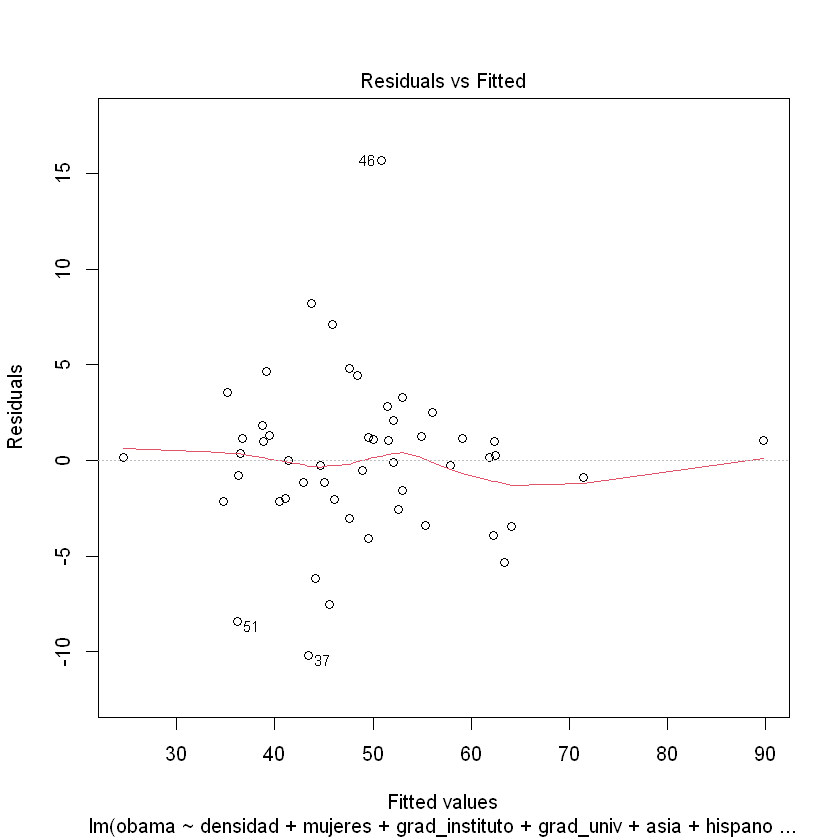

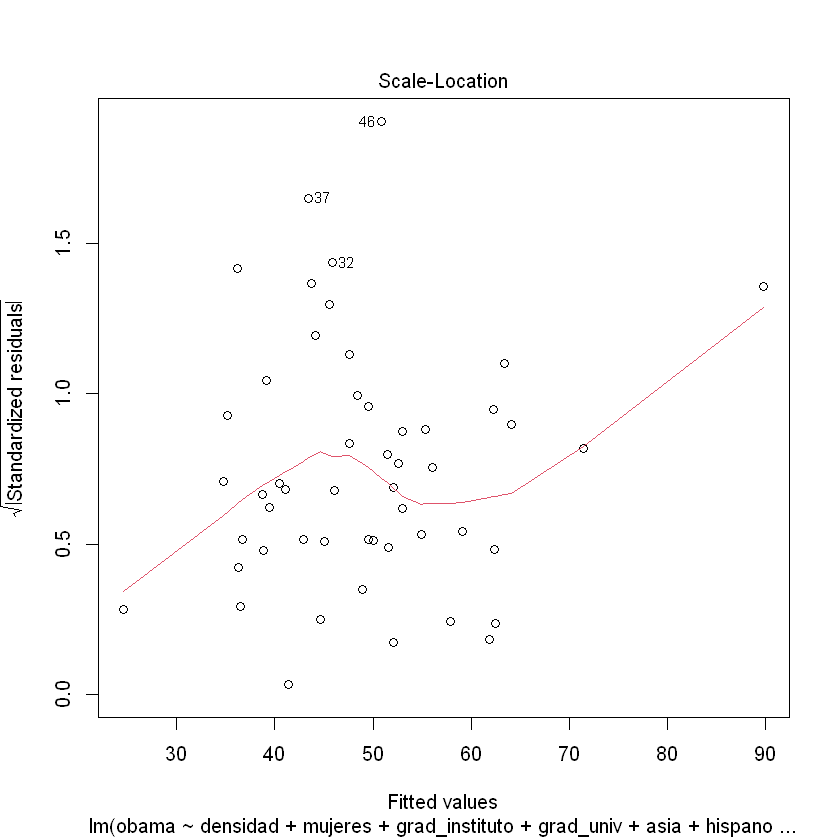

In [62]:
# Comenzamos a realizar la tarea de diagnosis del mejor modelo 
plot(ols, which=1)
plot(ols, which=3)

Por la primera gráfica, parece que a medida que aumenta el valor de $\hat{y}$ los residuos se van acercando a $0$, por lo que es posible que no exista homocedasticidad entre estas dos variables.

In [63]:
# Obtenemos los residuos
eps = output$residuals

# Obtenemos los resultados del test de Bartlett
bartlett.test(list(ols$fitted.values, eps))


	Bartlett test of homogeneity of variances

data:  list(ols$fitted.values, eps)
Bartlett's K-squared = 40.558, df = 1, p-value = 1.909e-10


Efectivamente, el valor p que hemos obtenido es considerablemente menor que el nivel de significancia $\alpha = 0.05$. En consecuencia, los residuos no presentan una distribución uniforme a lo largo del ajuste realizado en el modelo de regresión.


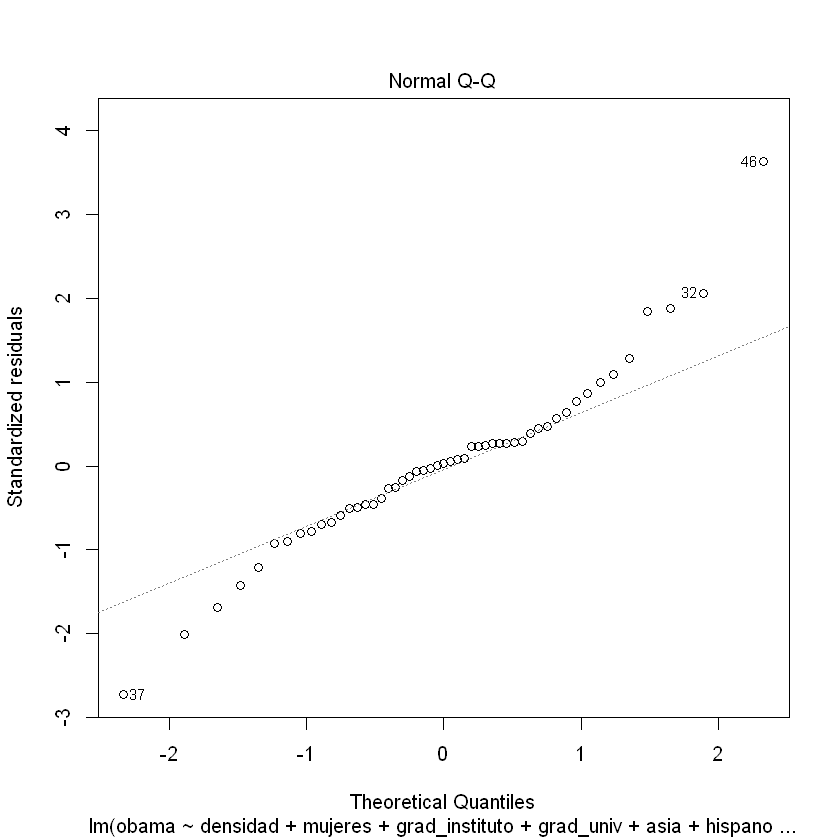

In [64]:
# Obtenemos la gráfica quantil-quantil
plot(ols, which=2)

Por otra parte, cabe la posibilidad de que la distribución de los residuos sea normal, ya que la mayoría de los puntos parecen ajustarse adecuadamente a una línea recta. No obstante, es necesario llevar a cabo un contraste de hipótesis para corroborar esto, ya que algunos puntos muestran una considerable dispersión.


In [65]:
# Aplicamos el test de K-S-L para contrastar la normalidad
lillie.test(eps)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  eps
D = 0.14064, p-value = 0.01327


Realmente el $p$-valor es inferior a $\alpha$, por lo que debemos rechazar la hipótesis nula de que provengan de una distribución normal.

Warning message in sqrt(crit * p * (1 - hh)/hh):
"Se han producido NaNs"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"Se han producido NaNs"


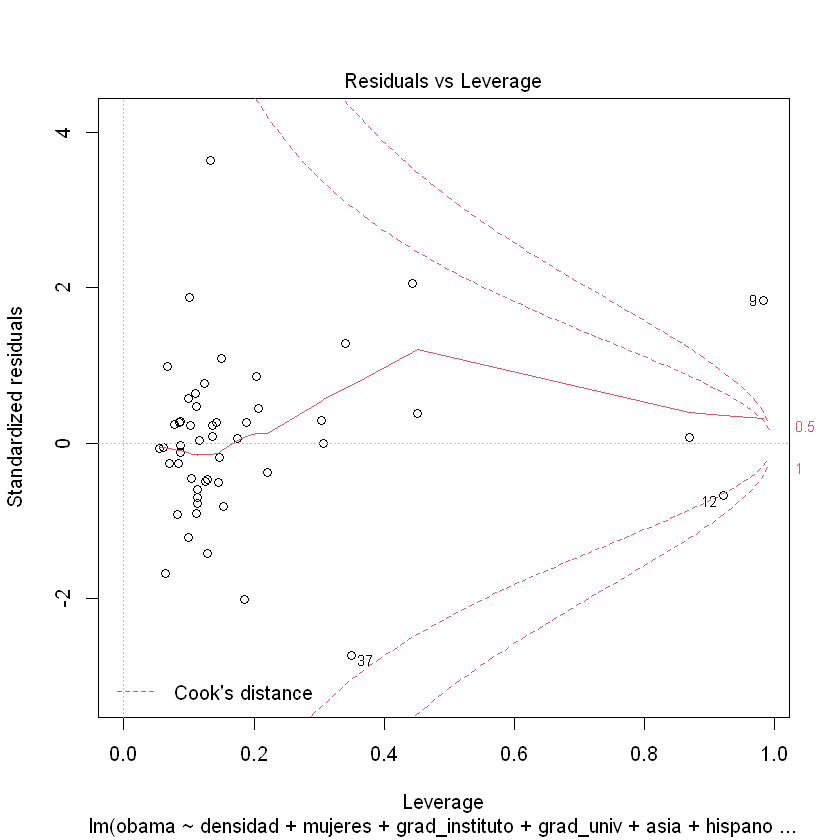

In [66]:
plot(ols, which=5)

En esta última gráfica se aprecian varios puntos influyentes que se sitúan fuera de la línea de Cook. Estos puntos se identifican con los valores $9$ y $12$. El primero de ellos no solo se considera un valor atípico, sino que también ejerce un efecto significativo en el modelo, mientras que el segundo se clasifica como un valor atípico debido a la dirección (positiva o negativa) de su residuo. En conclusión, procedemos a realizar un análisis de la correlación entre las variables independientes que hemos tenido en cuenta.


In [67]:
# Seleccionamos las variables que nos interesan
usa = usa[, c(
    'densidad',
    'mujeres',
    'grad_instituto',
    'grad_univ', 
    'asia',
    'hispanos',
    'evangelicos',
    'mormones',
    'paro',
    'obama'
)]

Para usar el coeficiente de correlación de Pearson debemos comprobar la normalidad y homocedasticidad de las variables implicadas

In [68]:
# Aplicamos el test de K-S-L para contrastar la normalidad
lapply(usa, FUN=function(x) lillie.test(x)$p.value)

$densidad
[1] 6.018834e-22

$mujeres
[1] 0.2902627

$grad_instituto
[1] 0.1230087

$grad_univ
[1] 0.1377534

$asia
[1] 7.473319e-11

$hispanos
[1] 5.897892e-06

$evangelicos
[1] 0.00229042

$mormones
[1] 7.196657e-20

$paro
[1] 0.2571063

$obama
[1] 0.617724

Los $p$-valores de las variables `densidad`, `asia`, `hispanos`, `evangelicos` y `mormones` son menores que el nivel de significación $\alpha = 0.05$, por lo que estas no siguen una distribución normal.

In [69]:
pairwise.bartlett.test(usa)

densidad      mujeres      grad_instituto grad_univ    
densidad       1             1.07872e-147 4.477618e-117  6.561591e-105
mujeres        1.07872e-147  1            1.174372e-18   4.307967e-30 
grad_instituto 4.477618e-117 1.174372e-18 1              0.0001066455 
grad_univ      6.561591e-105 4.307967e-30 0.0001066455   1            
asia           5.509873e-106 4.723156e-29 0.00039012     0.7253705    
hispanos       6.322697e-93  7.416671e-42 4.633596e-13   0.0001340336 
evangelicos    5.880101e-89  8.540351e-46 1.988876e-16   5.83291e-07  
mormones       3.441538e-96  1.254094e-38 1.806496e-10   0.004953957  
paro           3.751708e-131 2.348513e-07 8.626763e-06   8.144782e-15 
obama          1.529063e-89  3.257034e-45 6.420317e-16   1.387776e-06 
               asia          hispanos     evangelicos  mormones    
densidad       5.509873e-106 6.322697e-93 5.880101e-89 3.441538e-96
mujeres        4.723156e-29  7.416671e-42 8.540351e-46 1.254094e-38
grad_instituto 0.00039012    4.633596e-13 1.988876e-16 1.806496e-10
grad_univ      0.7253705     0.0001340336 5.83291e-07  0.004953957 
asia           1             3.413922e-05 1.121827e-07 0.001654099 
hispanos       3.413922e-05  1            0.1963219    0.2874192   
evangelicos    1.121827e-07  0.1963219    1            0.01928689  
mormones       0.001654099   0.2874192    0.01928689   1           
paro           6.584857e-14  1.044109e-25 1.636633e-29 1.239064e-22
obama          2.771949e-07  0.2702484    0.8485439    0.0312621   
               paro          obama       
densidad       3.751708e-131 1.529063e-89
mujeres        2.348513e-07  3.257034e-45
grad_instituto 8.626763e-06  6.420317e-16
grad_univ      8.144782e-15  1.387776e-06
asia           6.584857e-14  2.771949e-07
hispanos       1.044109e-25  0.2702484   
evangelicos    1.636633e-29  0.8485439   
mormones       1.239064e-22  0.0312621   
paro           1             6.005489e-29
obama          6.005489e-29  1

La gran mayoría de variables no son homocedásticas, ya que sus $p$-valores asociados son menores que $\alpha$, luego se rechaza la hipótesis nula de que sus varianzas sean iguales. Algunos pares, como `(grad_univ, asia)`, entre otros, sí son homocedásticos. Veamos la correlación entre las variables con el coeficiente de Pearson y con algún otro para compararlos, ya que no se cumplen las condiciones del test de Pearson.

In [70]:
cor(usa)

,densidad,mujeres,grad_instituto,grad_univ,asia,hispanos,evangelicos,mormones,paro,obama
densidad,1.000000000,0.46583195,-0.00383585,0.6372451158,0.01398511,0.005067992,-0.18730620,-0.08036094,0.1985266715,0.58395513
mujeres,0.465831947,1.00000000,-0.39047508,0.2945415320,-0.15143633,-0.099208396,0.06268464,-0.33579558,0.3712009419,0.49398463
grad_instituto,-0.003835850,-0.39047508,1.00000000,0.3931829947,0.06160028,-0.376128189,-0.49656222,0.17862817,-0.5605433382,0.09749664
grad_univ,0.637245116,0.29454153,0.39318299,1.0000000000,0.18051305,0.128221027,-0.55889734,-0.02207835,-0.0003502951,0.71548540
asia,0.013985112,-0.15143633,0.06160028,0.1805130549,1.00000000,0.176863909,-0.11957990,0.02161304,0.0536920213,0.41033684
hispanos,0.005067992,-0.09920840,-0.37612819,0.1282210271,0.17686391,1.000000000,-0.22423503,0.10665199,0.3383900390,0.16013135
evangelicos,-0.187306203,0.06268464,-0.49656222,-0.5588973395,-0.11957990,-0.224235034,1.00000000,-0.22799088,0.1415075705,-0.40239620
mormones,-0.080360944,-0.33579558,0.17862817,-0.0220783481,0.02161304,0.106651990,-0.22799088,1.00000000,-0.1214247656,-0.34773216
paro,0.198526672,0.37120094,-0.56054334,-0.0003502951,0.05369202,0.338390039,0.14150757,-0.12142477,1.0000000000,0.33776511
obama,0.583955135,0.49398463,0.09749664,0.7154854024,0.41033684,0.160131354,-0.40239620,-0.34773216,0.3377651085,1.00000000


In [71]:
cor(usa, method='spearman')

,densidad,mujeres,grad_instituto,grad_univ,asia,hispanos,evangelicos,mormones,paro,obama
densidad,1.0000000,0.761542119,-0.3274801,0.36979886,0.40603005,0.19837517,-0.172081150,-0.57450581,0.47475785,0.6153080
mujeres,0.7615421,1.000000000,-0.4398110,0.11306787,0.03573213,-0.06278908,0.009008601,-0.67095079,0.43599653,0.3956403
grad_instituto,-0.3274801,-0.439811020,1.0000000,0.43920708,0.00887420,-0.20211394,-0.418592801,0.27021487,-0.56846902,0.1056276
grad_univ,0.3697989,0.113067869,0.4392071,1.00000000,0.54873471,0.35439486,-0.600122801,-0.01154306,-0.04387495,0.6527445
asia,0.4060301,0.035732127,0.0088742,0.54873471,1.00000000,0.54052526,-0.296081513,0.04731709,0.22985981,0.5686737
hispanos,0.1983752,-0.062789077,-0.2021139,0.35439486,0.54052526,1.00000000,-0.358439466,0.17662646,0.36082243,0.2852682
evangelicos,-0.1720811,0.009008601,-0.4185928,-0.60012280,-0.29608151,-0.35843947,1.000000000,0.03613503,0.12442201,-0.4745490
mormones,-0.5745058,-0.670950786,0.2702149,-0.01154306,0.04731709,0.17662646,0.036135028,1.00000000,-0.10790008,-0.1511067
paro,0.4747578,0.435996529,-0.5684690,-0.04387495,0.22985981,0.36082243,0.124422007,-0.10790008,1.00000000,0.3221425
obama,0.6153080,0.395640315,0.1056276,0.65274447,0.56867367,0.28526817,-0.474549022,-0.15110670,0.32214255,1.0000000


Simplemente vamos a destacar algún par de variables con un alto coeficiente de correlación y algún otro con uno muy bajo y vamos a comprobar después si son significativos. Por ejemplo, el par `(mujeres, densidad)` parece tener un coficiente de correlación de Spearman bastante alto ($0.76$) y medianamente alto para Pearson ($0.46$). Si esta correlación (o cualqueir otra) es significativa, significará que hay colinealidad, lo que podría afectar a las estimaciones de los parámetros. Por otro lado, el par `(asia, grad_instituto)` parece mostrar poca correlación ($0.008$ para Spearman y $0.061$ para Pearson).

In [72]:
pairwise.cor.test(usa)

densidad     mujeres      grad_instituto grad_univ   
densidad       0            0.000571288  0.9786875      4.953752e-07
mujeres        0.000571288  0            0.004613808    0.03589703  
grad_instituto 0.9786875    0.004613808  0              0.004314318 
grad_univ      4.953752e-07 0.03589703   0.004314318    0           
asia           0.9224068    0.2887838    0.6676204      0.2049389   
hispanos       0.971844     0.4885374    0.006524634    0.3698846   
evangelicos    0.1881218    0.6621185    0.0002104273   2.02037e-05 
mormones       0.5750891    0.01599558   0.2097872      0.8777826   
paro           0.1625456    0.007323987  1.886852e-05   0.9980535   
obama          6.850231e-06 0.0002296534 0.4961067      3.633164e-09
               asia        hispanos    evangelicos  mormones   paro        
densidad       0.9224068   0.971844    0.1881218    0.5750891  0.1625456   
mujeres        0.2887838   0.4885374   0.6621185    0.01599558 0.007323987 
grad_instituto 0.6676204   0.006524634 0.0002104273 0.2097872  1.886852e-05
grad_univ      0.2049389   0.3698846   2.02037e-05  0.8777826  0.9980535   
asia           0           0.2143977   0.4032644    0.8803394  0.7082541   
hispanos       0.2143977   0           0.1136777    0.4563359  0.01514867  
evangelicos    0.4032644   0.1136777   0            0.1075972  0.3219255   
mormones       0.8803394   0.4563359   0.1075972    0          0.395995    
paro           0.7082541   0.01514867  0.3219255    0.395995   0           
obama          0.002783687 0.2616592   0.003419285  0.01240851 0.01534909  
               obama       
densidad       6.850231e-06
mujeres        0.0002296534
grad_instituto 0.4961067   
grad_univ      3.633164e-09
asia           0.002783687 
hispanos       0.2616592   
evangelicos    0.003419285 
mormones       0.01240851  
paro           0.01534909  
obama          0

In [73]:
suppressWarnings(pairwise.cor.test(usa, method='spearman'))

densidad     mujeres      grad_instituto grad_univ   
densidad       0            8.668158e-11 0.01898691     0.007566462 
mujeres        8.668158e-11 0            0.001240865    0.4295358   
grad_instituto 0.01898691   0.001240865  0              0.001262503 
grad_univ      0.007566462  0.4295358    0.001262503    0           
asia           0.003114069  0.8034136    0.9507185      3.057155e-05
hispanos       0.1628731    0.6615896    0.1549317      0.01072454  
evangelicos    0.2272507    0.9499731    0.002235935    3.245711e-06
mormones       1.040827e-05 7.137958e-08 0.05514623     0.9359247   
paro           0.0004315528 0.001383297  1.350596e-05   0.759826    
obama          1.548914e-06 0.004057462  0.4606977      2.094141e-07
               asia         hispanos     evangelicos  mormones     paro        
densidad       0.003114069  0.1628731    0.2272507    1.040827e-05 0.0004315528
mujeres        0.8034136    0.6615896    0.9499731    7.137958e-08 0.001383297 
grad_instituto 0.9507185    0.1549317    0.002235935  0.05514623   1.350596e-05
grad_univ      3.057155e-05 0.01072454   3.245711e-06 0.9359247    0.759826    
asia           0            4.230806e-05 0.03489456   0.7416122    0.1046661   
hispanos       4.230806e-05 0            0.009801473  0.2150235    0.009290404 
evangelicos    0.03489456   0.009801473  0            0.8012417    0.3843496   
mormones       0.7416122    0.2150235    0.8012417    0            0.4510522   
paro           0.1046661    0.009290404  0.3843496    0.4510522    0           
obama          1.338832e-05 0.04244873   0.0004344322 0.2898469    0.0211466   
               obama       
densidad       1.548914e-06
mujeres        0.004057462 
grad_instituto 0.4606977   
grad_univ      2.094141e-07
asia           1.338832e-05
hispanos       0.04244873  
evangelicos    0.0004344322
mormones       0.2898469   
paro           0.0211466   
obama          0

Para el par de variables `(mujeres, densidad)`, hemos obtenido un $p$-valor menor que el nivel de significación establecido, $\alpha = 0.05$, en todos los casos. Esto conduce a la conclusión de que debemos rechazar la hipótesis nula que sugiere que el coeficiente de correlación entre estas variables es nulo. En otras palabras, existe evidencia de colinealidad entre las variables explicativas.

Sin embargo, en el caso del segundo par de variables `(asia, grad_instituto)`, observamos que el $p$-valor es considerablemente mayor que $\alpha$ en ambas situaciones. Esto indica que no existe una correlación significativa entre estas dos variables.

En resumen, hemos obtenido un modelo con un alto valor de $R^2$ ajustado, pero enfrenta diversos problemas que suelen surgir en modelos de regresión lineal múltiple. No obstante, en cualquier caso, parece ser una mejora con respecto al modelo ajustado en el primer caso.


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>